In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
data = pd.read_csv('benchmark_comparison_results.csv')

In [3]:
data.

,Unnamed: 0,num_seqs,max_len,my_time,its_time
0,0,2,4,0.000614,0.000036
1,1,2,8,0.001835,0.000081
2,2,2,16,0.006177,0.000232
3,3,2,32,0.032205,0.001291
4,4,2,64,0.103107,0.003093
5,5,2,128,0.359448,0.011832
6,6,2,256,1.508497,0.055401
7,7,4,4,0.001509,0.000527
8,8,4,8,0.005016,0.002075
9,9,4,16,0.017866,0.011871


In [18]:
num_seqs = [2, 4, 8, 12]
max_len = [4, 8, 16, 32, 64, 128, 256]
markers = ['v', 'o', 's', '*']

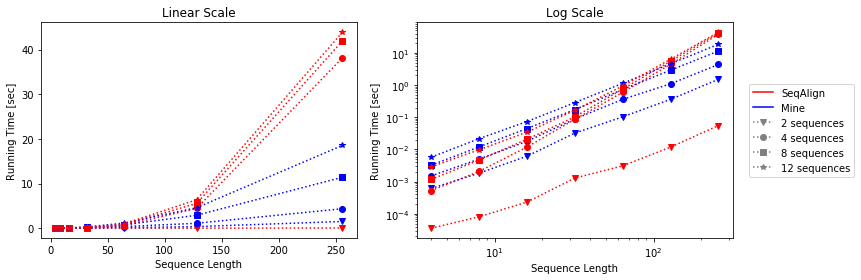

In [55]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for n, marker in zip(num_seqs, markers):
    sel = data[data['num_seqs'] == n]
    plt.plot(sel['max_len'], sel['my_time'], color='blue', 
             marker=marker, linestyle=':')
    plt.plot(sel['max_len'], sel['its_time'], color='red', 
             marker=marker, linestyle=':',)
plt.xlabel('Sequence Length')
plt.ylabel('Running Time [sec]')
plt.title('Linear Scale')

plt.subplot(1, 2, 2)
for n, marker in zip(num_seqs, markers):
    sel = data[data['num_seqs'] == n]
    plt.loglog(sel['max_len'], sel['my_time'], color='blue', 
               marker=marker, linestyle=':')
    plt.loglog(sel['max_len'], sel['its_time'], color='red', 
               marker=marker, linestyle=':')
plt.xlabel('Sequence Length')
plt.ylabel('Running Time [sec]')
plt.title('Log Scale')

items = [
    Line2D([0], [0], color='red', label='SeqAlign'),
    Line2D([0], [0], color='blue', label='Mine'),
    Line2D([0], [0], color='gray', linestyle=':', marker='v', label='2 sequences'),
    Line2D([0], [0], color='gray', linestyle=':', marker='o', label='4 sequences'),
    Line2D([0], [0], color='gray', linestyle=':', marker='s', label='8 sequences'),
    Line2D([0], [0], color='gray', linestyle=':', marker='*', label='12 sequences'),
]
plt.legend(handles=items, loc='center right', bbox_to_anchor=(1.4, 0.5))

plt.tight_layout()
plt.savefig('scaling_plot.svg')